# Signle race qualifying predictor

### Goal

Predict each driver’s qualifying position (or time) for one race, based only on that race’s data — no history, no cross-track info yet.

In [48]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1.core import Laps

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [50]:
# Enable the cache by providing the name of the cache folder, speed up
ff1.Cache.enable_cache('cache')

# Setup plotting, setup the plot (bg: black, ...)
plotting.setup_mpl()

In [51]:
session = ff1.get_session(2024, 'Bahrain', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']


In [52]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671c6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,,NaN,0 days 00:01:30.031000,0 days 00:01:29.374000,0 days 00:01:29.179000,NaT,,NaN,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,e8002d,ferrari,Charles,Leclerc,Charles Leclerc,...,2.0,,NaN,0 days 00:01:30.243000,0 days 00:01:29.165000,0 days 00:01:29.407000,NaT,,NaN,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27f4d2,mercedes,George,Russell,George Russell,...,3.0,,NaN,0 days 00:01:30.350000,0 days 00:01:29.922000,0 days 00:01:29.485000,NaT,,NaN,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,e8002d,ferrari,Carlos,Sainz,Carlos Sainz,...,4.0,,NaN,0 days 00:01:29.909000,0 days 00:01:29.573000,0 days 00:01:29.507000,NaT,,NaN,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,3671c6,red_bull,Sergio,Perez,Sergio Perez,...,5.0,,NaN,0 days 00:01:30.221000,0 days 00:01:29.932000,0 days 00:01:29.537000,NaT,,NaN,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,6.0,,NaN,0 days 00:01:30.179000,0 days 00:01:29.801000,0 days 00:01:29.542000,NaT,,NaN,NaN
4,4,L NORRIS,NOR,norris,McLaren,ff8000,mclaren,Lando,Norris,Lando Norris,...,7.0,,NaN,0 days 00:01:30.143000,0 days 00:01:29.941000,0 days 00:01:29.614000,NaT,,NaN,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,ff8000,mclaren,Oscar,Piastri,Oscar Piastri,...,8.0,,NaN,0 days 00:01:30.531000,0 days 00:01:30.122000,0 days 00:01:29.683000,NaT,,NaN,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,27f4d2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,9.0,,NaN,0 days 00:01:30.451000,0 days 00:01:29.718000,0 days 00:01:29.710000,NaT,,NaN,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,b6babd,haas,Nico,Hulkenberg,Nico Hulkenberg,...,10.0,,NaN,0 days 00:01:30.566000,0 days 00:01:29.851000,0 days 00:01:30.502000,NaT,,NaN,NaN


In [53]:
laps = session.laps

In [54]:
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:22:20.980000,VER,1,NaT,1.0,1.0,0 days 00:20:10.428000,NaT,NaT,0 days 00:00:46.454000,...,True,Red Bull Racing,0 days 00:20:10.428000,2024-03-01 16:06:46.101,1,NaN,False,,False,False
1,0 days 00:23:51.011000,VER,1,0 days 00:01:30.031000,2.0,1.0,NaT,NaT,0 days 00:00:28.787000,0 days 00:00:38.580000,...,True,Red Bull Racing,0 days 00:22:20.980000,2024-03-01 16:08:56.653,1,NaN,False,,False,True
2,0 days 00:25:59.737000,VER,1,0 days 00:02:08.726000,3.0,1.0,NaT,0 days 00:25:58.003000,0 days 00:00:37.524000,0 days 00:00:56.168000,...,True,Red Bull Racing,0 days 00:23:51.011000,2024-03-01 16:10:26.684,1,NaN,False,,False,False
3,0 days 00:31:09.934000,VER,1,NaT,4.0,2.0,0 days 00:29:18.091000,NaT,NaT,0 days 00:00:46.144000,...,False,Red Bull Racing,0 days 00:25:59.737000,2024-03-01 16:12:35.410,1,NaN,False,,False,False
4,0 days 00:32:40.094000,VER,1,0 days 00:01:30.160000,5.0,2.0,NaT,NaT,0 days 00:00:28.822000,0 days 00:00:38.767000,...,False,Red Bull Racing,0 days 00:31:09.934000,2024-03-01 16:17:45.607,1,NaN,False,,False,True


In [55]:
laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                267 non-null    timedelta64[ns]
 1   Driver              267 non-null    object         
 2   DriverNumber        267 non-null    object         
 3   LapTime             169 non-null    timedelta64[ns]
 4   LapNumber           267 non-null    float64        
 5   Stint               267 non-null    float64        
 6   PitOutTime          92 non-null     timedelta64[ns]
 7   PitInTime           92 non-null     timedelta64[ns]
 8   Sector1Time         175 non-null    timedelta64[ns]
 9   Sector2Time         267 non-null    timedelta64[ns]
 10  Sector3Time         261 non-null    timedelta64[ns]
 11  Sector1SessionTime  175 non-null    timedelta64[ns]
 12  Sector2SessionTime  267 non-null    timedelta64[ns]
 13  Sector3SessionTime  261 non-null    timedelta6

In [56]:
laps_clean = laps.pick_quicklaps()
laps_clean = laps_clean.dropna(subset=['LapTime'])      # remove Nan lap times rows
laps_clean.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:23:51.011000,VER,1,0 days 00:01:30.031000,2.0,1.0,NaT,NaT,0 days 00:00:28.787000,0 days 00:00:38.580000,...,True,Red Bull Racing,0 days 00:22:20.980000,2024-03-01 16:08:56.653,1,NaN,False,,False,True
4,0 days 00:32:40.094000,VER,1,0 days 00:01:30.160000,5.0,2.0,NaT,NaT,0 days 00:00:28.822000,0 days 00:00:38.767000,...,False,Red Bull Racing,0 days 00:31:09.934000,2024-03-01 16:17:45.607,1,NaN,False,,False,True
7,0 days 00:45:09.390000,VER,1,0 days 00:01:29.374000,8.0,3.0,NaT,NaT,0 days 00:00:28.509000,0 days 00:00:38.387000,...,True,Red Bull Racing,0 days 00:43:40.016000,2024-03-01 16:30:15.689,1,NaN,False,,False,True
12,0 days 01:05:23.162000,VER,1,0 days 00:01:29.421000,13.0,5.0,NaT,NaT,0 days 00:00:28.686000,0 days 00:00:38.361000,...,True,Red Bull Racing,0 days 01:03:53.741000,2024-03-01 16:50:29.414,1,NaN,False,,False,True
15,0 days 01:14:03.304000,VER,1,0 days 00:01:29.179000,16.0,6.0,NaT,NaT,0 days 00:00:28.535000,0 days 00:00:38.269000,...,True,Red Bull Racing,0 days 01:12:34.125000,2024-03-01 16:59:09.798,1,NaN,False,,False,True


In [57]:
laps_clean.info()

<class 'fastf1.core.Laps'>
Index: 85 entries, 1 to 265
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                85 non-null     timedelta64[ns]
 1   Driver              85 non-null     object         
 2   DriverNumber        85 non-null     object         
 3   LapTime             85 non-null     timedelta64[ns]
 4   LapNumber           85 non-null     float64        
 5   Stint               85 non-null     float64        
 6   PitOutTime          0 non-null      timedelta64[ns]
 7   PitInTime           0 non-null      timedelta64[ns]
 8   Sector1Time         85 non-null     timedelta64[ns]
 9   Sector2Time         85 non-null     timedelta64[ns]
 10  Sector3Time         85 non-null     timedelta64[ns]
 11  Sector1SessionTime  85 non-null     timedelta64[ns]
 12  Sector2SessionTime  85 non-null     timedelta64[ns]
 13  Sector3SessionTime  85 non-null     timedelta64[ns]


In [58]:
laps_clean['Driver'].value_counts()

Driver
LEC    6
SAI    6
HAM    6
PIA    6
HUL    6
VER    5
RUS    5
PER    5
NOR    4
ALO    4
TSU    4
STR    4
ALB    4
RIC    4
MAG    4
GAS    3
OCO    3
BOT    2
SAR    2
ZHO    2
Name: count, dtype: int64

In [59]:
weather = session.weather_data
weather.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:15.662000,18.2,48.0,1018.8,False,22.2,53,2.7
1,0 days 00:01:15.661000,18.1,48.0,1018.8,False,22.2,51,2.9
2,0 days 00:02:15.648000,18.1,48.0,1018.8,False,22.2,57,2.1
3,0 days 00:03:15.646000,18.1,48.0,1018.8,False,22.2,48,2.4
4,0 days 00:04:15.662000,18.1,48.0,1018.8,False,22.2,45,2.3


In [60]:
laps_clean['LapStartTime'] = laps_clean['Time']

# Use merge_asof to assign closest weather measurement to each lap
laps_with_weather = pd.merge_asof(
    laps_clean.sort_values('LapStartTime'),
    weather.sort_values('Time'),
    left_on='LapStartTime',
    right_on='Time',
    direction = 'backward'    # use last known weather measurement
)

In [61]:
laps_with_weather.head()

,Time_x,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FastF1Generated,IsAccurate,Time_y,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:16:58.973000,SAI,55,0 days 00:01:31.208000,2.0,1.0,NaT,NaT,0 days 00:00:29.760000,0 days 00:00:38.878000,...,False,True,0 days 00:16:15.671000,18.1,48.0,1018.9,False,21.8,73,2.0
1,0 days 00:17:08.097000,LEC,16,0 days 00:01:31.260000,2.0,1.0,NaT,NaT,0 days 00:00:29.522000,0 days 00:00:39.009000,...,False,True,0 days 00:16:15.671000,18.1,48.0,1018.9,False,21.8,73,2.0
2,0 days 00:17:21.445000,OCO,31,0 days 00:01:31.990000,2.0,1.0,NaT,NaT,0 days 00:00:29.755000,0 days 00:00:39.305000,...,False,True,0 days 00:17:15.675000,18.0,48.0,1018.9,False,21.8,52,2.1
3,0 days 00:17:28.892000,GAS,10,0 days 00:01:32.434000,2.0,1.0,NaT,NaT,0 days 00:00:29.870000,0 days 00:00:39.498000,...,False,True,0 days 00:17:15.675000,18.0,48.0,1018.9,False,21.8,52,2.1
4,0 days 00:22:12.385000,ALB,23,0 days 00:01:30.692000,2.0,1.0,NaT,NaT,0 days 00:00:29.194000,0 days 00:00:38.750000,...,False,True,0 days 00:21:15.676000,18.1,47.0,1018.9,False,21.7,52,2.4


In [62]:
features = laps_with_weather[['Driver', 'Team', 'LapTime', 'LapNumber', 'Stint',
                       'TyreLife', 'FreshTyre', 'Compound', 'TrackTemp', 'AirTemp',
                       'Sector1Time', 'Sector2Time', 'Sector3Time']].copy()

features['LapTime'] = features['LapTime'].dt.total_seconds()
features['Sector1Time'] = features['Sector1Time'].dt.total_seconds()
features['Sector2Time'] = features['Sector2Time'].dt.total_seconds()
features['Sector3Time'] = features['Sector3Time'].dt.total_seconds()


In [63]:
features.head

<bound method NDFrame.head of    Driver             Team  LapTime  LapNumber  Stint  TyreLife  FreshTyre  \
0     SAI          Ferrari   91.208        2.0    1.0       2.0       True   
1     LEC          Ferrari   91.260        2.0    1.0       2.0       True   
2     OCO           Alpine   91.990        2.0    1.0       2.0       True   
3     GAS           Alpine   92.434        2.0    1.0       2.0       True   
4     ALB         Williams   90.692        2.0    1.0       2.0       True   
..    ...              ...      ...        ...    ...       ...        ...   
80    HAM         Mercedes   89.710       17.0    6.0       2.0       True   
81    VER  Red Bull Racing   89.179       16.0    6.0       2.0       True   
82    LEC          Ferrari   89.407       18.0    7.0       2.0       True   
83    SAI          Ferrari   89.507       17.0    6.0       2.0       True   
84    PER  Red Bull Racing   89.537       16.0    6.0       2.0       True   

   Compound  TrackTemp  AirTemp  

In [64]:
features.info()

<class 'fastf1.core.Laps'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Driver       85 non-null     object 
 1   Team         85 non-null     object 
 2   LapTime      85 non-null     float64
 3   LapNumber    85 non-null     float64
 4   Stint        85 non-null     float64
 5   TyreLife     85 non-null     float64
 6   FreshTyre    85 non-null     bool   
 7   Compound     85 non-null     object 
 8   TrackTemp    85 non-null     float64
 9   AirTemp      85 non-null     float64
 10  Sector1Time  85 non-null     float64
 11  Sector2Time  85 non-null     float64
 12  Sector3Time  85 non-null     float64
dtypes: bool(1), float64(9), object(3)
memory usage: 8.2+ KB


In [65]:
# One-hot encode Driver and Team
features_encoded = pd.get_dummies(features, columns=['Driver', 'Team'], drop_first=False)

# Map Tyre Compound to numeric
tyre_map = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2}
features_encoded['Compound'] = features_encoded['Compound'].map(tyre_map)

# Convert FreshTyre boolean to int
features_encoded['FreshTyre'] = features_encoded['FreshTyre'].astype(int)

# Check resulting DataFrame
features_encoded.head()

,LapTime,LapNumber,Stint,TyreLife,FreshTyre,Compound,TrackTemp,AirTemp,Sector1Time,Sector2Time,...,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Haas F1 Team,Team_Kick Sauber,Team_McLaren,Team_Mercedes,Team_RB,Team_Red Bull Racing,Team_Williams
0,91.208,2.0,1.0,2.0,1,1,21.8,18.1,29.760,38.878,...,False,False,True,False,False,False,False,False,False,False
1,91.260,2.0,1.0,2.0,1,1,21.8,18.1,29.522,39.009,...,False,False,True,False,False,False,False,False,False,False
2,91.990,2.0,1.0,2.0,1,1,21.8,18.0,29.755,39.305,...,True,False,False,False,False,False,False,False,False,False
3,92.434,2.0,1.0,2.0,1,1,21.8,18.0,29.870,39.498,...,True,False,False,False,False,False,False,False,False,False
4,90.692,2.0,1.0,2.0,1,0,21.7,18.1,29.194,38.750,...,False,False,False,False,False,False,False,False,False,True


In [66]:
features_encoded.info()

<class 'fastf1.core.Laps'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LapTime               85 non-null     float64
 1   LapNumber             85 non-null     float64
 2   Stint                 85 non-null     float64
 3   TyreLife              85 non-null     float64
 4   FreshTyre             85 non-null     int64  
 5   Compound              85 non-null     int64  
 6   TrackTemp             85 non-null     float64
 7   AirTemp               85 non-null     float64
 8   Sector1Time           85 non-null     float64
 9   Sector2Time           85 non-null     float64
 10  Sector3Time           85 non-null     float64
 11  Driver_ALB            85 non-null     bool   
 12  Driver_ALO            85 non-null     bool   
 13  Driver_BOT            85 non-null     bool   
 14  Driver_GAS            85 non-null     bool   
 15  Driver_HAM            85 non-null   

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [68]:
# Split features (X) and target (y)
X = features_encoded.drop(columns=['LapTime'])
y = features_encoded['LapTime']

In [69]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [70]:
# Create Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,   # number of trees
    max_depth=5,        # limit depth to avoid overfitting
    random_state=42
)

In [71]:
# train the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [72]:
# Predict on test set
y_pred = rf.predict(X_test)

In [73]:
# evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.3f} seconds")
print(f"Root Mean Squared Error: {rmse:.3f} seconds")


Mean Absolute Error: 0.112 seconds
Root Mean Squared Error: 0.137 seconds


In [74]:
# Feature importance (optional)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Sector2Time    0.749645
Sector1Time    0.110293
Sector3Time    0.102991
TrackTemp      0.011783
Compound       0.007792
LapNumber      0.002811
Driver_OCO     0.002784
Stint          0.002193
AirTemp        0.002147
Driver_VER     0.001313
dtype: float64

In [75]:
y_pred

array([90.61445173, 91.12736358, 90.5978708 , 89.69112663, 90.57556821,
       89.39913798, 91.08823799, 90.79158188, 90.60495757, 90.47712271,
       91.00878921, 90.96860308, 90.31317203, 90.05377695, 90.57618553,
       90.00798664, 90.09251874, 89.48244701, 90.0952991 , 89.75671095,
       90.99843882, 90.9807164 ])

In [76]:
# -------------------------------
# 1️⃣ Combine predictions with test features
# -------------------------------
pred_df = X_test.copy()
pred_df['PredictedLapTime'] = y_pred
pred_df['Driver'] = features.loc[X_test.index, 'Driver']

# -------------------------------
# 2️⃣ Compute best predicted lap per driver
# -------------------------------
best_pred_laps = pred_df.groupby('Driver')['PredictedLapTime'].min().sort_values()
best_pred_laps = best_pred_laps.reset_index()
best_pred_laps['PredictedRank'] = best_pred_laps['PredictedLapTime'].rank(method='min')

# -------------------------------
# 3️⃣ Compute actual best lap per driver in test set
# -------------------------------
actual_best_laps = features.loc[X_test.index].groupby('Driver')['LapTime'].min().sort_values()
actual_best_laps = actual_best_laps.reset_index()
actual_best_laps['ActualRank'] = actual_best_laps['LapTime'].rank(method='min')

# -------------------------------
# 4️⃣ Merge predicted and actual rankings
# -------------------------------
comparison = best_pred_laps.merge(actual_best_laps, on='Driver')
comparison = comparison[['Driver', 'PredictedLapTime', 'PredictedRank', 'LapTime', 'ActualRank']]
comparison.columns = ['Driver', 'PredictedLapTime', 'PredictedRank', 'ActualLapTime', 'ActualRank']

# -------------------------------
# 5️⃣ Sort by predicted rank for easy viewing
# -------------------------------
comparison = comparison.sort_values('PredictedRank').reset_index(drop=True)
comparison['Right'] = comparison['PredictedRank'] == comparison['ActualRank']
comparison


,Driver,PredictedLapTime,PredictedRank,ActualLapTime,ActualRank,Right
0,LEC,89.399138,1.0,89.407,1.0,True
1,NOR,89.482447,2.0,89.614,2.0,True
2,SAI,89.691127,3.0,89.909,4.0,False
3,HUL,90.007987,4.0,89.851,3.0,False
4,PER,90.053777,5.0,90.030,6.0,False
5,STR,90.092519,6.0,89.965,5.0,False
6,VER,90.313172,7.0,90.160,7.0,True
7,PIA,90.575568,8.0,90.651,9.0,False
8,MAG,90.576186,9.0,90.529,8.0,False
9,ALB,90.604958,10.0,90.692,10.0,True


In [77]:
pred_df['PredictedLapTime']

78    90.614452
0     91.127364
68    90.597871
22    89.691127
12    90.575568
82    89.399138
10    91.088238
18    90.791582
4     90.604958
66    90.477123
40    91.008789
47    90.968603
35    90.313172
72    90.053777
55    90.576186
54    90.007987
33    90.092519
77    89.482447
42    90.095299
49    89.756711
11    90.998439
30    90.980716
Name: PredictedLapTime, dtype: float64

In [78]:
colors = session.results[['Abbreviation', 'TeamColor']]

comparison = comparison.merge(colors, left_on='Driver', right_on='Abbreviation', how='left')

comparison['TeamColor'] = '#' + comparison['TeamColor']

driver_colors = dict(zip(comparison['Abbreviation'], comparison['TeamColor']))

### Visualize predicted vs actual laps

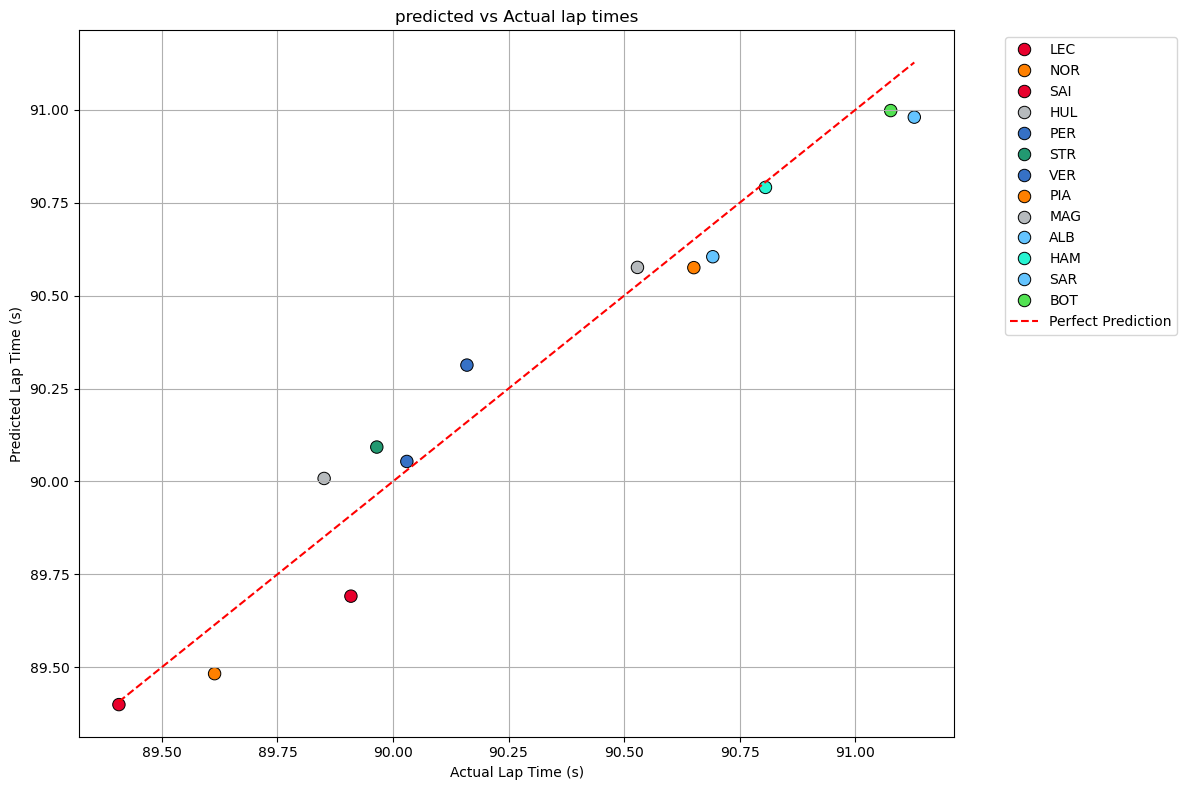

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,8))

sns.scatterplot(data=comparison, 
                x='ActualLapTime', 
                y='PredictedLapTime', 
                hue='Driver', 
                palette=driver_colors,
                s=80,
                edgecolor='black'
                )


plt.plot([comparison['ActualLapTime'].min(), comparison['ActualLapTime'].max()],
         [comparison['ActualLapTime'].min(), comparison['ActualLapTime'].max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.title("predicted vs Actual lap times")
plt.xlabel("Actual Lap Time (s)")
plt.ylabel("Predicted Lap Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
pred_df

,LapNumber,Stint,TyreLife,FreshTyre,Compound,TrackTemp,AirTemp,Sector1Time,Sector2Time,Sector3Time,...,Team_Ferrari,Team_Haas F1 Team,Team_Kick Sauber,Team_McLaren,Team_Mercedes,Team_RB,Team_Red Bull Racing,Team_Williams,PredictedLapTime,Driver
78,17.0,6.0,5.0,0,0,21.0,17.9,28.993,38.890,22.733,...,False,True,False,False,False,False,False,False,90.614452,HUL
0,2.0,1.0,2.0,1,1,21.8,18.1,29.760,38.878,22.570,...,True,False,False,False,False,False,False,False,91.127364,SAI
68,14.0,5.0,5.0,0,0,21.1,17.9,29.162,38.852,22.637,...,False,False,False,True,False,False,False,False,90.597871,PIA
22,5.0,2.0,2.0,1,0,21.8,18.1,29.008,38.409,22.492,...,True,False,False,False,False,False,False,False,89.691127,SAI
12,2.0,1.0,2.0,1,0,21.7,18.1,29.243,38.780,22.669,...,False,False,False,True,False,False,False,False,90.575568,PIA
82,18.0,7.0,2.0,1,0,20.9,17.9,28.762,38.276,22.369,...,True,False,False,False,False,False,False,False,89.399138,LEC
10,2.0,1.0,2.0,1,0,21.7,18.1,29.196,39.255,22.801,...,False,True,False,False,False,False,False,False,91.088238,MAG
18,2.0,1.0,2.0,1,0,21.7,18.1,29.108,38.989,22.709,...,False,False,False,False,True,False,False,False,90.791582,HAM
4,2.0,1.0,2.0,1,0,21.7,18.1,29.194,38.750,22.748,...,False,False,False,False,False,False,False,True,90.604958,ALB
66,14.0,5.0,5.0,0,0,21.1,17.9,29.028,38.891,22.583,...,False,True,False,False,False,False,False,False,90.477123,HUL


### Compare predicrted vs actual ranks

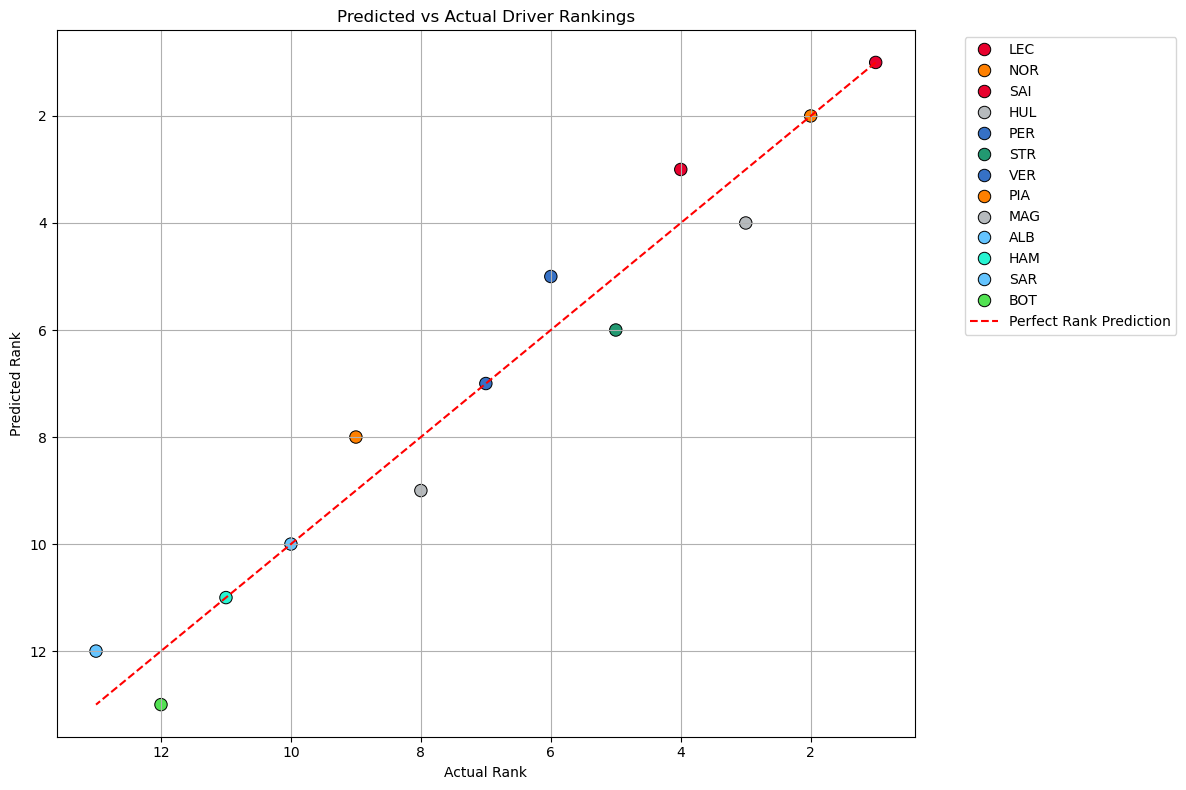

In [88]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=comparison, 
                x='ActualRank', 
                y='PredictedRank', 
                hue='Driver', 
                palette=driver_colors,
                s=80,
                edgecolor='black'
                )

plt.plot([1, comparison['ActualRank'].max()], [1, comparison['ActualRank'].max()],
         color='red', linestyle='--', label='Perfect Rank Prediction')
plt.title('Predicted vs Actual Driver Rankings')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Feature importance (for Random Forest)

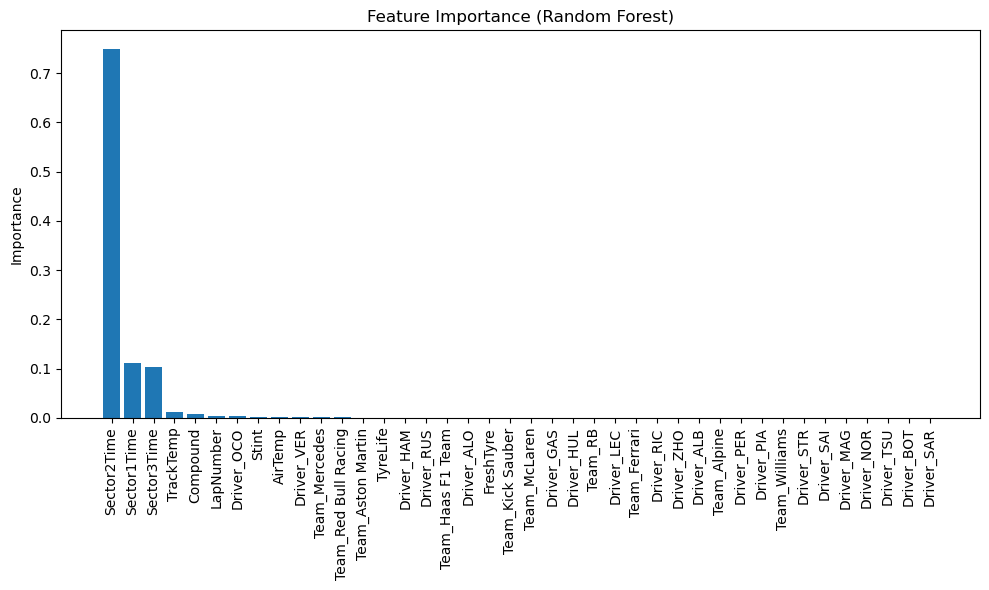

In [90]:
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()